In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

### read in data arrays

In [2]:
# save LRG data arrays

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_LRG.npz', ra_LRG=ra_LRG)
# print(ra_LRG.shape)
data_raLRG_new = np.load('/Users/mtownsend/Documents/LRG_Data/ra_LRG-dr8.npz')
raLRG_new = data_raLRG_new['ra_LRG']
print(raLRG_new.shape)

data_raLRG_og = np.load('/Users/mtownsend/Documents/LRG_Data/ra_LRG.npz')
raLRG_og = data_raLRG_og['ra_LRG']
print(raLRG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_LRG.npz', dec_LRG=dec_LRG)
# print(dec_LRG.shape)
data_decLRG_new = np.load('/Users/mtownsend/Documents/LRG_Data/dec_LRG-dr8.npz')
decLRG_new = data_decLRG_new['dec_LRG']
print(decLRG_new.shape)

data_decLRG_og = np.load('/Users/mtownsend/Documents/LRG_Data/dec_LRG.npz')
decLRG_og = data_decLRG_og['dec_LRG']
print(decLRG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/z_LRG.npz', z_LRG=z_LRG)
# print(z_LRG.shape)
data_zLRG_new = np.load('/Users/mtownsend/Documents/LRG_Data/z_LRG-dr8.npz')
zLRG_new = data_zLRG_new['z_LRG']
print(zLRG_new.shape)

data_zLRG_og = np.load('/Users/mtownsend/Documents/LRG_Data/z_LRG.npz')
zLRG_og = data_zLRG_og['z_LRG']
print(zLRG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_LRG.npz', gmag_LRG=gmag_LRG)
# print(gmag_LRG.shape)
data_gmagLRG_new = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_LRG-dr8.npz')
gmagLRG_new = data_gmagLRG_new['gmag_LRG']
print(gmagLRG_new.shape)

data_gmagLRG_og = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_LRG.npz')
gmagLRG_og = data_gmagLRG_og['gmag_LRG']
print(gmagLRG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_LRG.npz', rmag_LRG=rmag_LRG)
# print(rmag_LRG.shape)
data_rmagLRG_new = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_LRG-dr8.npz')
rmagLRG_new = data_rmagLRG_new['rmag_LRG']
print(rmagLRG_new.shape)

data_rmagLRG_og = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_LRG.npz')
rmagLRG_og = data_rmagLRG_og['rmag_LRG']
print(rmagLRG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_LRG.npz', zmag_LRG=zmag_LRG)
# print(zmag_LRG.shape)
data_zmagLRG_new = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_LRG-dr8.npz')
zmagLRG_new = data_zmagLRG_new['zmag_LRG']
print(zmagLRG_new.shape)

data_zmagLRG_og = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_LRG.npz')
zmagLRG_og = data_zmagLRG_og['zmag_LRG']
print(zmagLRG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG.npz', grcolor_LRG=grcolor_LRG)
# print(grcolor_LRG.shape)
data_grcolorLRG_new = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG-dr8.npz')
grcolorLRG_new = data_grcolorLRG_new['grcolor_LRG']
print(grcolorLRG_new.shape)

data_grcolorLRG_og = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG.npz')
grcolorLRG_og = data_grcolorLRG_og['grcolor_LRG']
print(grcolorLRG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG.npz', rzcolor_LRG=rzcolor_LRG)
# print(rzcolor_LRG.shape)
data_rzcolorLRG_new = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG-dr8.npz')
rzcolorLRG_new = data_rzcolorLRG_new['rzcolor_LRG']
print(rzcolorLRG_new.shape)

data_rzcolorLRG_og = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG.npz')
rzcolorLRG_og = data_rzcolorLRG_og['rzcolor_LRG']
print(rzcolorLRG_og.shape)



# percent kept for new catalog only
data_percent_kept = np.load('/Users/mtownsend/Documents/LRG_Data/percent_kept.npz')
percent_kept = data_percent_kept['percent_kept']
print(len(percent_kept))

(1875,)
(1823,)
----
(1875,)
(1823,)
----
(1875,)
(1823,)
----
(1875,)
(1823,)
----
(1875,)
(1823,)
----
(1875,)
(1823,)
----
(1875,)
(1823,)
----
(1875,)
(1823,)
1875


In [3]:
# save BKG data arrays

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_BKG.npz', ra_BKG=ra_BKG)
# print(ra_BKG.shape)
data_raBKG_new = np.load('/Users/mtownsend/Documents/LRG_Data/ra_BKG-dr8.npz')
raBKG_new = data_raBKG_new['ra_BKG']
print(raBKG_new.shape)

data_raBKG_og = np.load('/Users/mtownsend/Documents/LRG_Data/ra_BKG.npz')
raBKG_og = data_raBKG_og['ra_BKG']
print(raBKG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_BKG.npz', dec_BKG=dec_BKG)
# print(dec_BKG.shape)
data_decBKG_new = np.load('/Users/mtownsend/Documents/LRG_Data/dec_BKG-dr8.npz')
decBKG_new = data_decBKG_new['dec_BKG']
print(decBKG_new.shape)

data_decBKG_og = np.load('/Users/mtownsend/Documents/LRG_Data/dec_BKG.npz')
decBKG_og = data_decBKG_og['dec_BKG']
print(decBKG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_BKG.npz', gmag_BKG=gmag_BKG)
# print(gmag_BKG.shape)
data_gmagBKG_new = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_BKG-dr8.npz')
gmagBKG_new = data_gmagBKG_new['gmag_BKG']
print(gmagBKG_new.shape)
      
data_gmagBKG_og = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_BKG.npz')
gmagBKG_og = data_gmagBKG_og['gmag_BKG']
print(gmagBKG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_BKG.npz', rmag_BKG=rmag_BKG)
# print(rmag_BKG.shape)
data_rmagBKG_new = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_BKG-dr8.npz')
rmagBKG_new = data_rmagBKG_new['rmag_BKG']
print(rmagBKG_new.shape)
      
data_rmagBKG_og = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_BKG.npz')
rmagBKG_og = data_rmagBKG_og['rmag_BKG']
print(rmagBKG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_BKG.npz', zmag_BKG=zmag_BKG)
# print(zmag_BKG.shape)
data_zmagBKG_new = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_BKG-dr8.npz')
zmagBKG_new = data_zmagBKG_new['zmag_BKG']
print(zmagBKG_new.shape)
      
data_zmagBKG_og = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_BKG.npz')
zmagBKG_og = data_zmagBKG_og['zmag_BKG']
print(zmagBKG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG.npz', grcolor_BKG=grcolor_BKG)
# print(grcolor_BKG.shape)
data_grcolorBKG_new = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG-dr8.npz')
grcolorBKG_new = data_grcolorBKG_new['grcolor_BKG']
print(grcolorBKG_new.shape)
      
data_grcolorBKG_og = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG.npz')
grcolorBKG_og = data_grcolorBKG_og['grcolor_BKG']
print(grcolorBKG_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG.npz', rzcolor_BKG=rzcolor_BKG)
# print(rzcolor_BKG.shape)
data_rzcolorBKG_new = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG-dr8.npz')
rzcolorBKG_new = data_rzcolorBKG_new['rzcolor_BKG']
print(rzcolorBKG_new.shape)
      
data_rzcolorBKG_og = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG.npz')
rzcolorBKG_og = data_rzcolorBKG_og['rzcolor_BKG']
print(rzcolorBKG_og.shape)


(529674,)
(517525,)
----
(529674,)
(517525,)
----
(529674,)
(517525,)
----
(529674,)
(517525,)
----
(529674,)
(517525,)
----
(529674,)
(517525,)
----
(529674,)
(517525,)


In [4]:
# save combined LRG and BKG lists

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_total.npz', ra=ra)
# print(ra.shape)
data_ra_new = np.load('/Users/mtownsend/Documents/LRG_Data/ra_total-dr8.npz')
ra_total_new = data_ra_new['ra']
print(ra_total_new.shape)

data_ra_og = np.load('/Users/mtownsend/Documents/LRG_Data/ra_total.npz')
ra_total_og = data_ra_og['ra']
print(ra_total_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_total.npz', dec=dec)
# print(dec.shape)
data_dec_new = np.load('/Users/mtownsend/Documents/LRG_Data/dec_total-dr8.npz')
dec_total_new = data_dec_new['dec']
print(dec_total_new.shape)

data_dec_og = np.load('/Users/mtownsend/Documents/LRG_Data/dec_total.npz')
dec_total_og = data_dec_og['dec']
print(dec_total_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz', gmag=gmag)
# print(gmag.shape)
data_gmag_new = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_total-dr8.npz')
gmag_total_new = data_gmag_new['gmag']
print(gmag_total_new.shape)

data_gmag_og = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz')
gmag_total_og = data_gmag_og['gmag']
print(gmag_total_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz', rmag=rmag)
# print(rmag.shape)
data_rmag_new = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_total-dr8.npz')
rmag_total_new = data_rmag_new['rmag']
print(rmag_total_new.shape)

data_rmag_og = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz')
rmag_total_og = data_rmag_og['rmag']
print(rmag_total_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz', zmag=zmag)
# print(zmag.shape)
data_zmag_new = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_total-dr8.npz')
zmag_total_new = data_zmag_new['zmag']
print(zmag_total_new.shape)

data_zmag_og = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz')
zmag_total_og = data_zmag_og['zmag']
print(zmag_total_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz', grcolor=grcolor)
# print(grcolor.shape)
data_grcolor_new = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_total-dr8.npz')
grcolor_total_new = data_grcolor_new['grcolor']
print(grcolor_total_new.shape)

data_grcolor_og = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz')
grcolor_total_og = data_grcolor_og['grcolor']
print(grcolor_total_og.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz', rzcolor=rzcolor)
# print(rzcolor.shape)
data_rzcolor_new = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_total-dr8.npz')
rzcolor_total_new = data_rzcolor_new['rzcolor']
print(rzcolor_total_new.shape)

data_rzcolor_og = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz')
rzcolor_total_og = data_rzcolor_og['rzcolor']
print(rzcolor_total_og.shape)

# print(rzcolor_total[0:10])
# print(rzcolor_total[0])
# print(rzcolor_total[5])

(531549,)
(519348,)
----
(531549,)
(519348,)
----
(531549,)
(519348,)
----
(531549,)
(519348,)
----
(531549,)
(519348,)
----
(531549,)
(519348,)
----
(531549,)
(519348,)


### begin analysis

In [5]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA_new, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(zLRG_new)
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA_og, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(zLRG_og)


print("end cosmoCalc")


end cosmoCalc


In [ ]:
print(zmag_total_new.max())
print(zmag_total_og.max())

print('----')

print(rzcolor_total_new.max())
print(rzcolor_total_og.max())

print('----')

print(grcolor_total_new.max())
print(grcolor_total_og.max())

print()
print('----')
print('----')
print()

print(zmag_total_new.min())
print(zmag_total_og.min())

print('----')

print(rzcolor_total_new.min())
print(rzcolor_total_og.min())

print('----')

print(grcolor_total_new.min())
print(grcolor_total_og.min())

In [6]:
# rz_edges_og = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
# # zmag_edges = np.array([13.22509, 14.025090026855466, 15.025090026855462, 16.02509002685546, 17.025090026855455, 18.02509002685545, 19.025090026855448, 20.025090026855445, 21.025, 22.025090026855437, 23.025090026855434])
# gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

# # rzinit = -1.8027077
# # rzfin = 10.44729232788086
# # rz_interval = 0.5
# # rz_num = (rzfin-rzinit)/rz_interval
# # rz_edges, step = np.linspace(rzinit, rzfin, num=int(rz_num), retstep=True)
# # print(len(rz_edges))

# # grinit = -6.5846786
# # grfin = 10.56532135009765
# # gr_interval = 0.5
# # gr_num = (grfin-grinit)/gr_interval
# # gr_edges, step = np.linspace(grinit, grfin, num=int(gr_num), retstep=True)
# # print(len(gr_edges))

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(len(zmag_edges))


# # rzcolor range for new catalog
    
# rz_edges_new, step = np.linspace(rzcolor_total_new.min(), rzcolor_total_new.max(), num=50, endpoint=True, retstep=True)

# # rzinit = -2.6097374
# # rzfin = 10.44729232788086
# # rz_interval = 0.5
# # rz_num = (rzfin-rzinit)/rz_interval
# # rz_edges_new, step = np.linspace(rzinit, rzfin, num=int(rz_num), retstep=True)
# # # print(len(rz_edges_new))



# edges calculations
gr_edges, step = np.linspace(grcolor_total_og.min(), grcolor_total_og.max(), num=50, endpoint=True, retstep=True)
print(gr_edges)
rz_edges_new, step = np.linspace(rzcolor_total_new.min(), rzcolor_total_new.max(), num=50, endpoint=True, retstep=True)
print(rz_edges_new)
rz_edges_og, step = np.linspace(rzcolor_total_og.min(), rzcolor_total_og.max(), num=50, endpoint=True, retstep=True)
print(rz_edges_og)

H1_og, nouse_edges_og = np.histogramdd((rzcolor_total_og, grcolor_total_og, zmag_total_og), bins=(rz_edges_og, gr_edges, zmag_edges), density=False)
H1_new, nouse_edges_new = np.histogramdd((rzcolor_total_new, grcolor_total_new, zmag_total_new), bins=(rz_edges_new, gr_edges, zmag_edges), density=False)

# print(len(rz_edges_new))
# print(len(rz_edges_og))
# print(step)
# print(len(gr_edges))
# print(step)

# print()

# print(rz_edges_new)
# print()
# print(rz_edges_og)


50
[-6.58467865 -6.21463671 -5.84459476 -5.47455282 -5.10451087 -4.73446893
 -4.36442698 -3.99438504 -3.62434309 -3.25430115 -2.8842592  -2.51421726
 -2.14417532 -1.77413337 -1.40409143 -1.03404948 -0.66400754 -0.29396559
  0.07607635  0.4461183   0.81616024  1.18620219  1.55624413  1.92628607
  2.29632802  2.66636996  3.03641191  3.40645385  3.7764958   4.14653774
  4.51657969  4.88662163  5.25666358  5.62670552  5.99674746  6.36678941
  6.73683135  7.1068733   7.47691524  7.84695719  8.21699913  8.58704108
  8.95708302  9.32712497  9.69716691 10.06720885 10.4372508  10.80729274
 11.17733469 11.54737663]
[-2.6097374  -2.34501874 -2.08030008 -1.81558142 -1.55086276 -1.2861441
 -1.02142544 -0.75670678 -0.49198812 -0.22726946  0.03744919  0.30216785
  0.56688651  0.83160517  1.09632383  1.36104249  1.62576115  1.89047981
  2.15519847  2.41991713  2.68463579  2.94935444  3.2140731   3.47879176
  3.74351042  4.00822908  4.27294774  4.5376664   4.80238506  5.06710372
  5.33182238  5.5965410

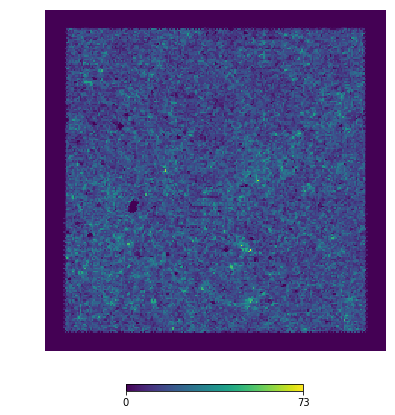

length phi:  519348


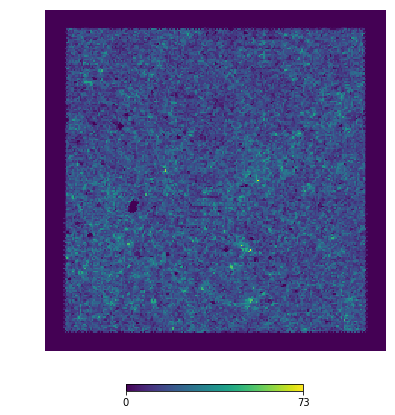

length phi:  531549


In [7]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024*2
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra_total_og)):
    theta.append(np.radians(90. - dec_total_og[i]))
    phi.append(np.radians(ra_total_og[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums_og = hp.ang2pix(nside, theta, phi, nest=True)






# Make HEALPix map using just new RA/Dec; end up with a density plot

nside = 1024*2
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra_total_new)):
    theta.append(np.radians(90. - dec_total_new[i]))
    phi.append(np.radians(ra_total_new[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums_new = hp.ang2pix(nside, theta, phi, nest=True)


In [8]:
# # for og catalog

# distance = 0.5 # must be in Mpc

# # distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, random_raLRG, random_decLRG, random_raBKG, random_decBKG, random_zmagLRG, random_zmagBKG, random_rzcolorLRG, random_rzcolorBKG, random_grcolorLRG, random_grcolorBKG, nouse_edges)
# distance_kpc_og, near_og, gal_tree_og, dist_og, index_og, nn1_og = nearNeighbor(distance, kpc_DA_og, raLRG_og, decLRG_og, raBKG_og, decBKG_og, zmagLRG_og, zmagBKG_og, rzcolorLRG_og, rzcolorBKG_og, grcolorLRG_og, grcolorBKG_og, nouse_edges_og)

# print('end nearNeighbor')



# for new catalog

distance = 0.5 # must be in Mpc

# distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, random_raLRG, random_decLRG, random_raBKG, random_decBKG, random_zmagLRG, random_zmagBKG, random_rzcolorLRG, random_rzcolorBKG, random_grcolorLRG, random_grcolorBKG, nouse_edges)
distance_kpc_new, near_new, gal_tree_new, dist_new, index_new, nn1_new = nearNeighbor(distance, kpc_DA_new, raLRG_new, decLRG_new, raBKG_new, decBKG_new, zmagLRG_new, zmagBKG_new, rzcolorLRG_new, rzcolorBKG_new, grcolorLRG_new, grcolorBKG_new, nouse_edges_new)

print('end nearNeighbor')

end nearNeighbor


In [10]:
inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

# rzcolor_tot = np.concatenate([random_rzcolorLRG, random_rzcolorBKG])
# grcolor_tot = np.concatenate([random_grcolorLRG, random_grcolorBKG])
# zmag_tot = np.concatenate([random_zmagLRG, random_zmagBKG])

# for og catalog

# Nbkg_og, indices_og, omega_og, localBKG_og = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, raLRG_og, decLRG_og, pixnums_og, zmag_total_og, rzcolor_total_og, grcolor_total_og, nouse_edges_og, distance_kpc_og, kpc_DA_og)

# omega = np.array(omega_og)

# print("end bkg")


# for new catalog

Nbkg_new, indices_new, omega_new, localBKG_new = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, raLRG_new, decLRG_new, pixnums_new, zmag_total_new, rzcolor_total_new, grcolor_total_new, nouse_edges_new, distance_kpc_new, kpc_DA_new, percent_kept)

omega = np.array(omega_new)

print("end bkg")

end bkg


In [12]:
# Nbkg_arr_og = np.array(Nbkg_og)
Nbkg_arr_new = np.array(Nbkg_new)

In [13]:
# Nsat_og = np.array(near_og) - np.array(Nbkg_og)
Nsat_new = np.array(near_new) - np.array(Nbkg_new)

In [ ]:
# totalNear(near)
# plt.show()

# totalNbkg(Nbkg_arr)
# plt.show()

# totalNsat(Nsat)
# plt.show()


In [16]:
# np.savez('/Users/mtownsend/Desktop/data_Nsat_og.npz', Nsat_og=Nsat_og)
np.savez('/Users/mtownsend/Desktop/data_Nsat_new.npz', Nsat_new=Nsat_new)


# # print(Nsat.shape)
# data_Nsat_og = np.load('/Users/mtownsend/Desktop/data_Nsat_og.npz')
# Nsat_data_og = data_Nsat_og['Nsat_og']
# print(Nsat_data_og.shape)

data_Nsat_new = np.load('/Users/mtownsend/Desktop/data_Nsat_new.npz')
Nsat_data_new = data_Nsat_new['Nsat_new']
print(Nsat_data_new.shape)

(1875, 49, 49, 49)


In [17]:
# Nsat_bin1_og = Nsat_data_og[np.where((zLRG_og >= 0.2) & (zLRG_og < 0.35))]
# Nsat_bin2_og = Nsat_data_og[np.where((zLRG_og >= 0.35) & (zLRG_og < 0.5))]
# Nsat_bin3_og = Nsat_data_og[np.where((zLRG_og >= 0.5) & (zLRG_og < 0.65))]

# print(len(Nsat_bin1_og))
# print(len(Nsat_bin2_og))
# print(len(Nsat_bin3_og))
# print(len(Nsat_bin1_og) + len(Nsat_bin2_og) + len(Nsat_bin3_og))

# print()
# print()
# print()

Nsat_bin1_new = Nsat_new[np.where((zLRG_new >= 0.2) & (zLRG_new < 0.35))]
Nsat_bin2_new = Nsat_new[np.where((zLRG_new >= 0.35) & (zLRG_new < 0.5))]
Nsat_bin3_new = Nsat_new[np.where((zLRG_new >= 0.5) & (zLRG_new < 0.65))]

print(len(Nsat_bin1_new))
print(len(Nsat_bin2_new))
print(len(Nsat_bin3_new))
print(len(Nsat_bin1_new) + len(Nsat_bin2_new) + len(Nsat_bin3_new))

326
631
918
1875


In [18]:
# read in selection matrices

# # original
# data_smatrix_low = np.load('/Users/mtownsend/Desktop/lowz_smatrix-1matrices-v2.npz')
# smatrix_low = data_smatrix_low['smatrix']
# low_smatrix35 = smatrix_low[0]

# data_smatrix_mid = np.load('/Users/mtownsend/Desktop/midz_smatrix-2matrices-v2.npz')
# smatrix_mid = data_smatrix_mid['smatrix']
# mid_smatrix35 = smatrix_mid[0]
# mid_smatrix05 = smatrix_mid[1]

# data_smatrix_high = np.load('/Users/mtownsend/Desktop/highz_smatrix-3matrices-v2.npz')
# smatrix_high = data_smatrix_high['smatrix']
# high_smatrix35 = smatrix_high[0]
# high_smatrix05 = smatrix_high[1]
# high_smatrix65 = smatrix_high[2]

# new
data_smatrix_low = np.load('/Users/mtownsend/Desktop/lowz_smatrix-1matrices-newbins.npz')
smatrix_low = data_smatrix_low['smatrix']
low_smatrix35 = smatrix_low[0]

data_smatrix_mid = np.load('/Users/mtownsend/Desktop/midz_smatrix-2matrices-newbins.npz')
smatrix_mid = data_smatrix_mid['smatrix']
mid_smatrix35 = smatrix_mid[0]
mid_smatrix05 = smatrix_mid[1]

data_smatrix_high = np.load('/Users/mtownsend/Desktop/highz_smatrix-3matrices-newbins.npz')
smatrix_high = data_smatrix_high['smatrix']
high_smatrix35 = smatrix_high[0]
high_smatrix05 = smatrix_high[1]
high_smatrix65 = smatrix_high[2]

In [19]:
# apply masks to new result

# apply masks

# lowz
masked_Nsat_low35 = Nsat_bin1_new * low_smatrix35

np.savez('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_low_new.npz', masked_Nsat_low35=masked_Nsat_low35)
data_Nsat_low = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_low_new.npz')
Nsat35_low_new = data_Nsat_low['masked_Nsat_low35']

# midz
masked_Nsat_mid35 = Nsat_bin1_new * mid_smatrix35
masked_Nsat_mid05 = Nsat_bin2_new * mid_smatrix05

np.savez('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_mid_new.npz', masked_Nsat_mid35=masked_Nsat_mid35, masked_Nsat_mid05=masked_Nsat_mid05)
data_Nsat_mid = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_mid_new.npz')
Nsat35_mid_new = data_Nsat_mid['masked_Nsat_mid35']
Nsat05_mid_new = data_Nsat_mid['masked_Nsat_mid05']

# highz
masked_Nsat_high35 = Nsat_bin1_new * high_smatrix35
masked_Nsat_high05 = Nsat_bin2_new * high_smatrix05
masked_Nsat_high65 = Nsat_bin3_new * high_smatrix65

np.savez('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_high_new.npz', masked_Nsat_high35=masked_Nsat_high35, masked_Nsat_high05=masked_Nsat_high05, masked_Nsat_high65=masked_Nsat_high65)
data_Nsat_high = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_high_new.npz')
Nsat35_high_new = data_Nsat_high['masked_Nsat_high35']
Nsat05_high_new = data_Nsat_high['masked_Nsat_high05']
Nsat65_high_new = data_Nsat_high['masked_Nsat_high65']



In [ ]:
# apply masks

# lowz
# masked_Nsat_low35 = Nsat_bin1 * low_smatrix35

# np.savez('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_low.npz', masked_Nsat_low35=masked_Nsat_low35)
data_Nsat_low = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_low.npz')
Nsat35_low = data_Nsat_low['masked_Nsat_low35']

# midz
# masked_Nsat_mid35 = Nsat_bin1 * mid_smatrix35
# masked_Nsat_mid05 = Nsat_bin2 * mid_smatrix05

# np.savez('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_mid.npz', masked_Nsat_mid35=masked_Nsat_mid35, masked_Nsat_mid05=masked_Nsat_mid05)
data_Nsat_mid = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_mid.npz')
Nsat35_mid = data_Nsat_mid['masked_Nsat_mid35']
Nsat05_mid = data_Nsat_mid['masked_Nsat_mid05']

# highz
# masked_Nsat_high35 = Nsat_bin1 * high_smatrix35
# masked_Nsat_high05 = Nsat_bin2 * high_smatrix05
# masked_Nsat_high65 = Nsat_bin3 * high_smatrix65

# np.savez('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_high.npz', masked_Nsat_high35=masked_Nsat_high35, masked_Nsat_high05=masked_Nsat_high05, masked_Nsat_high65=masked_Nsat_high65)
data_Nsat_high = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_high.npz')
Nsat35_high = data_Nsat_high['masked_Nsat_high35']
Nsat05_high = data_Nsat_high['masked_Nsat_high05']
Nsat65_high = data_Nsat_high['masked_Nsat_high65']


mean number of satellites is 1.0656537446099665
median number of satellites is 0.6255730051795947
standard deviation of satellites is 2.3484734583333444
standard error is 0.13026986881672484


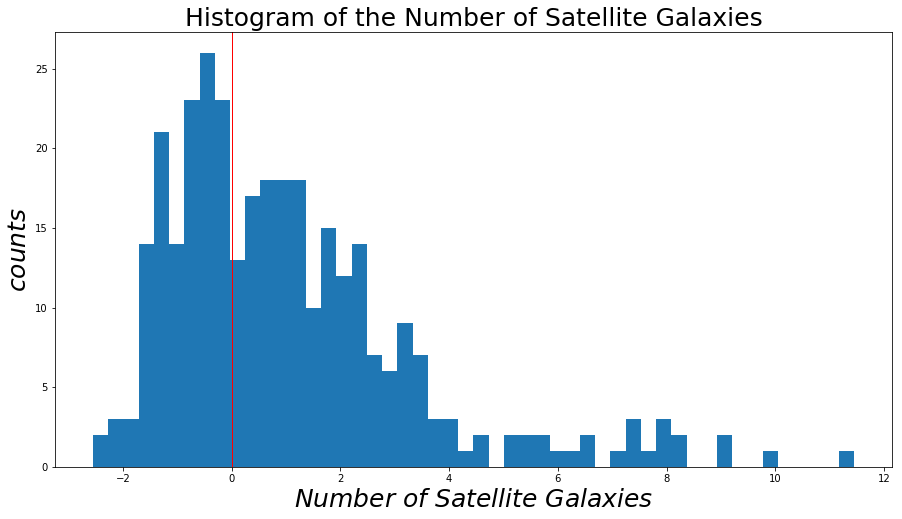

In [20]:
# totalNsat(Nsat35_low)
# plt.show()

totalNsat(Nsat35_low_new)
plt.show()


In [ ]:
totalNsat(Nsat35_mid)
plt.show()

totalNsat(Nsat35_mid_new)
plt.show()

print('----')
print('----')

totalNsat(Nsat05_mid)
plt.show()

totalNsat(Nsat05_mid_new)
plt.show()


In [ ]:
totalNsat(Nsat35_high)
plt.show()

totalNsat(Nsat35_high_new)
plt.show()

print('---')
print('----')

totalNsat(Nsat05_high)
plt.show()

totalNsat(Nsat05_high_new)
plt.show()

print('---')
print('----')

totalNsat(Nsat65_high)
plt.show()

totalNsat(Nsat65_high_new)
plt.show()
